## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading the data from csv and viewing a couple of rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#checking how many rows do I have in the table
df.shape[0]

294478

In [4]:
##checking what datatypes are in colums, it will help to make further counts
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

c. The number of unique users in the dataset.

In [5]:
#checkign how many unique users we have in the data
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
#checking the proportion by counting the mean for converted column
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#checking how many rows there are in the dataset with mislined version of test
df2 = df.query \
("(group == 'control' and landing_page == 'new_page') \
or (group == 'treatment' and landing_page == 'old_page')") 
df2.shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
#looking for nulls in dataset
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#filtering the data to have only control group on an old page and treatment group on new page
df2 = df.query(\
    "(group == 'control' and landing_page == 'old_page') \
    or (group == 'treatment' and landing_page == 'new_page')"
    )

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#counting unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#looking for duplicated user
df2[df2.duplicated(['user_id'])]['user_id'].unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [13]:
#Viewing data about a duplicate user
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#dropping the last row for user who was on page second time
df2 = df2.drop_duplicates(['user_id'], keep='last')

In [15]:
#checking if I had removed the row correctly
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#probability of user converting regardless of the page
conversion = df2['converted'].mean()
conversion

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#probability of users who were in control group
conv_contr = df2[df2['group'] == 'control']['converted'].mean()
conv_contr

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
##probability of users who were in control treatment group
conv_treat = df2[df2['group'] == 'treatment']['converted'].mean()
conv_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
##probability of "beeing" on a new page por the user
(df2['landing_page'] == 'new_page').mean()

0.50006194422266881

In [20]:
##difference between probabilities
diff = conv_treat-conv_contr
diff

-0.0015782389853555567

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Conclustion**:

It seams that new langind page is worse than the old one, but the difference betwen conversions is really small, and it is not staticaly prooven yet. The controll group, wich was on old page had higher conversion rate  than group which landed on new one, but the difference is only about 0,2%. 
The probability that user got into a new landing page is 0.5, which means that it's not possible for there to be a difference in conversion based on more visits.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The hipotestis should look like this:**
$$H_0: p_{new} - p_{old} \leq 0$$


$$H_1: p_{new} - p_{old} >0$$

In other words:
- The null hipotesis is that the difference between conversion on a new page is lower or equal to zero.
- The alternative hipotesis is that the difference between new conversion in comparison to the conversion on an old page is bigger than zero.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
#propbability for the p_new under the null
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
#propbability for the p_new under the null
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [23]:
#differences between p_new and p_old 
diff_p_new_old = p_new-p_old
diff_p_new_old

0.0

c. What is $n_{new}$?

In [24]:
#Counting rows for those who were on new page 
n_new = df2[df2['group']=='treatment']['user_id'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
#Counting rows for those who were on old
n_old = df2[df2['group']=='control']['user_id'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#simulating conversion for new landing page
new_page_converted = np.random.choice([0,1],
                    size = n_new, p=(1-p_new, p_new))

In [27]:
#the mean for new page simylated results
new_page_converted.mean()

0.12021884247470924

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
#simulating conversion for old landing page
old_page_converted = np.random.choice([0,1],
                    size = n_old, p=(1-p_old, p_old))

In [29]:
#the mean for old page sumulated results
old_page_converted.mean()

0.11976678552252984

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
#calculating difference in p under the null hypotesis
p_new_diff_p_old = new_page_converted.mean()-old_page_converted.mean()
p_new_diff_p_old

0.00045205695217939712

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [31]:
##simulating the conversion for 10000 times
p_diff = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],size = n_new, p=(1-p_new, p_new))
    old_page_converted = np.random.choice([0,1],size = n_old, p=(1-p_old, p_old))
    p_diff.append(new_page_converted.mean()-old_page_converted.mean())

In [32]:
#converting p_diff to array
p_diffs = np.array(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

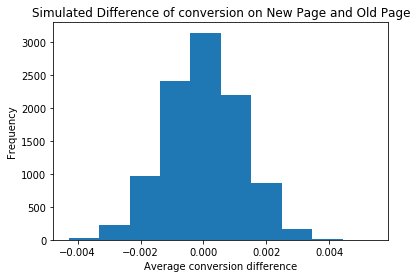

In [33]:
#Ploting a histogram
plt.title('Simulated Difference of conversion on New Page and Old Page')
plt.xlabel('Average conversion difference')
plt.ylabel('Frequency')
plt.hist(p_diffs);

In [34]:
#simulating values for null hipotesis and plotting a histogram
##null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
#plt.hist(null_vals);
#plt.axvline(x=diff_p_new_old, color = 'green')
#plt.title('Simulated Difference of New Page and Old Page for null hipotesis')
#plt.xlabel('Average conversion difference')
#plt.ylabel('Frequency');

In [35]:
#calculatin p_value
##p_val = (null_vals>diff_p_new_old).mean()
##p_val

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
##calculating the propotion of the p_diffs are greater than the actual difference observed in given data
p_val = (diff < p_diffs).mean()
p_val

0.90449999999999997

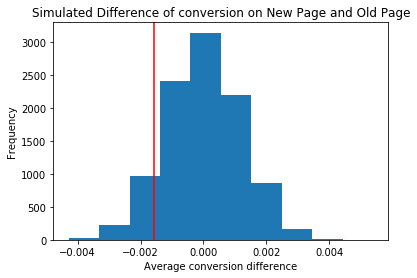

In [37]:
#ploting histogram with real difference
plt.hist(p_diffs);
plt.title('Simulated Difference of conversion on New Page and Old Page')
plt.xlabel('Average conversion difference')
plt.ylabel('Frequency')
plt.axvline(diff, color='red');

In [38]:
#checking if we can convifrm null hipotesis
H0_check = (p_val<0.05)
H0_check

False

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Conclusion:**
- The value callculated in scientific studies is p_value.
Which means the probability of getting the results we were given or more extreme results, when it comes that null hypothesis is true.

- It seems that we fail to reject H_0 hipotesis, because the  p_value for our test is greater than 0.05 as it was given in the test. We can tenn that there is no leveradge of conversion on a new page. We can conclude that null hipotesis is true because old page converted slightlu better

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
#importing the necessary library and checking if we have necessary data
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] == 'old_page']['converted'].sum()
conv_contr = df2[df2['group']=='control']['converted'].sum()
convert_new = df2[df2['landing_page'] == 'new_page']['converted'].sum()
n_old = df2[df2['landing_page']=='old_page']['user_id'].shape[0]
n_new = df2[df2['landing_page']=='new_page']['user_id'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [40]:
#printing the results to check 
print(convert_old)
print(conv_contr)
print(convert_new)
print(n_old)
print(n_new)

17489
17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
#calculating z_score and p_value
z_score , p_value = sm.stats.proportions_ztest(
    [convert_old, convert_new],[n_old,n_new], alternative = 'larger')

In [42]:
#Vieving the z_score and value
z_score, p_value

(1.3109241984234394, 0.094941687240975514)

In [43]:
# importing the neccesary libraries and calculating cdf to know how significat the z-score is
from scipy.stats import norm

norm.cdf(z_score)

0.90505831275902449

In [44]:
# calculating critical which at 95% (as two sides we deivde by 2)
critical_value = norm.ppf(1-(0.05/2))
critical_value

1.959963984540054

In [45]:
result = z_score > critical_value
result

False

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Comment**: 
The z_score is 1,3109 and the critical value is 1,95 therefore we can see that z_test result is smaller than critical value which means that we can not reject null hipoteisis. Regarding to conversion rate, we can si that old pafe is still slightly better than new page. 
These confirms the findings in part j and k. 



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We need to provide logistics regression becouse we will have only two outcomes

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [46]:
#viewing the data to remind
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [47]:
#adding an intercept
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [48]:
#dropping one column
df2 = df2.drop('control', axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [49]:
#importing the library and calcilating the Logit Model
import statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
#summary for logit mod
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:03:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Comment**:
The p_value asociated in with the ab_page is equall to 0.190. We are testing two different hipotesis one in part II where p_new nas smaller than equal to p_old and in here we are testing the equality between page new and page old

The null hipotesis and alternative hipotesis are:

$$ H_0: p_{new} \neq p_{old} $$$$ H_1: p_{new} = p_{old} $$


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Comment:**
We can also consider other factors of regression model, because they can affect the conversion rate. For example old user can dislike the new idea of page, becouse they prefer the old one and can have the change aversion. 
We also can consider on which device users browse our site, age of user, place of user or even the gender <- these factors can change the results and affect the conversion. 
On the other hand the one of the disadvantages of adding additional factors to regression model is Simpson's paradox where combined impact of different variables can dissapear when some of them are combined and also can be “discovered”  when these variables are tested individually.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [51]:
#importing countries data
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [52]:
#joinning countries data with ab_data on key user_id
df3_reg = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3_reg.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [53]:
#checking value counrs for countires
df3_reg['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [54]:
#adding dummy variables for CA and US
df3_reg['intercept'] = 1
df3_reg[['CA','US']] = pd.get_dummies(df3_reg['country'])[['CA','US']]

df3_reg['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [55]:
df3_reg.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
#importing the library and calcilating the Logit Model
mod = sm.Logit(df3_reg['converted'], df3_reg[['CA', 'US']])
results = mod.fit()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


In [57]:
#viewing the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Nov 2018   Pseudo R-squ.:                 -0.2214
Time:                        21:03:01   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

In [58]:
#checking conversion for params
np.exp(results.params)

CA    0.130350
US    0.135779
dtype: float64

In [59]:
##remindig the "firs" conversion rate
df.groupby('group').mean()['converted']

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

**Comment:**
- Also providing the data about regions from which users accesed the page we can see that the conversion doesen't differ a lot. 
- We also can conclude that there is no significant effect on conversion based on region.
- Which measn that we cannoct reject the null hipotesis


**Final Conclusions:**
- The conversion rate was better on old page, the difference isn't big as we calculated in different techniques. 
- That is why we accept the null hipotesis and reject the alternative one 
- This conclusions are based on the given data but the analysys is limitated by the factor not included in the set for example gender. We also dropped the data about one user, but this shouldynt affect the whole analysys. 


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0